In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df = pd.read_csv(r"C:\Users\Administrator\Downloads\movies\movies.csv")

In [3]:
#look at the dataset
df=df.dropna()

In [4]:
#check for missing data
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
df["budget"] = df["budget"].astype("int64")
df["gross"] = df["gross"].astype("int64")

In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [114]:
# df["yearcorrect"]=df["released"].astype(str).str[:4]

df['yearcorrect'] = pd.to_datetime(df['released'].str.split('(').str[0], format='%B %d, %Y', errors='coerce').dt.year


In [116]:
df= df.sort_values(by=["gross"], inplace=False, ascending=False)


In [20]:
x = df['budget']
y = df['gross']
correlation = x.corr(y)
correlation


0.7402465439219624

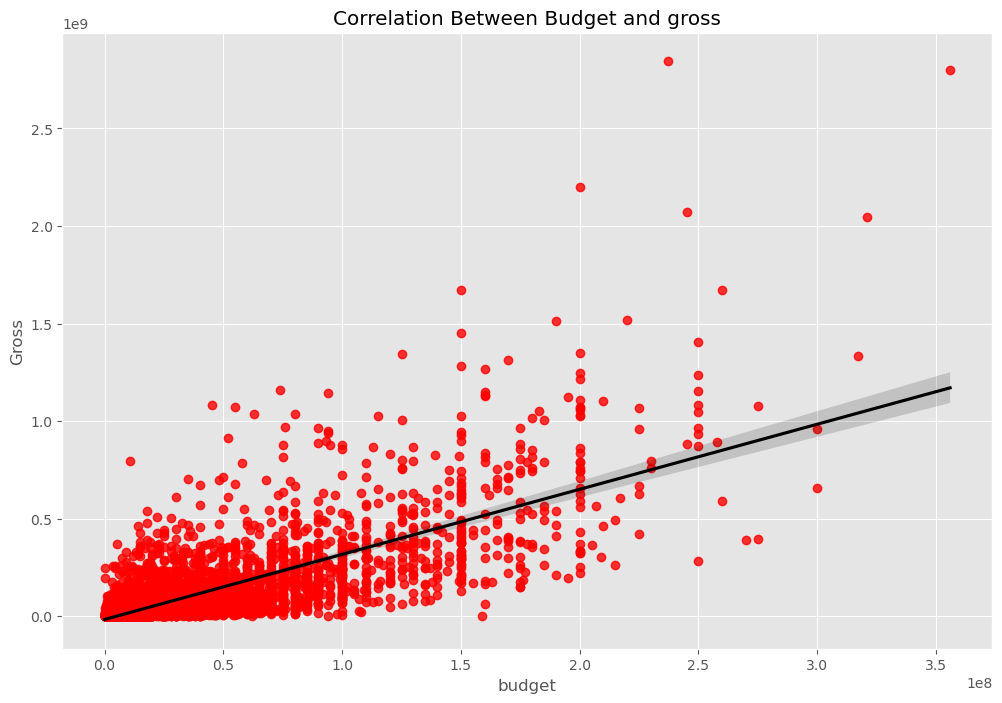

In [34]:
sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color": "black"})

plt.title("Correlation Between Budget and Gross")
plt.xlabel("budget")
plt.ylabel("Gross")
plt.show()

In [38]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,NaN
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,NaN
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,NaN
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,NaN
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,NaN
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,NaN
yearcorrect,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df.drop(columns=["yearcorrect"], inplace=True)

In [70]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


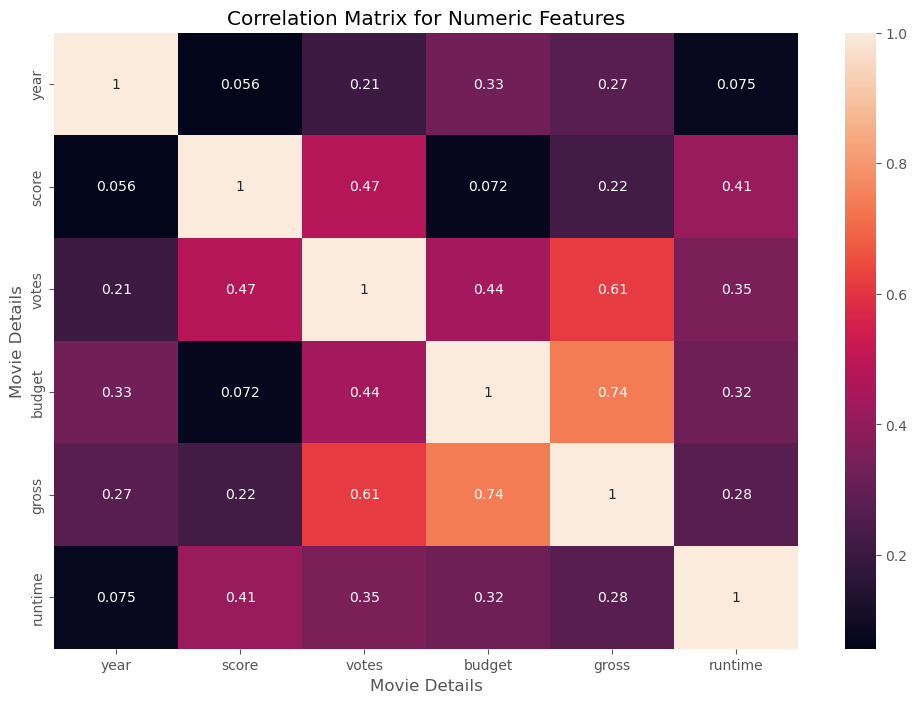

In [78]:
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel("Movie Details")
plt.ylabel("Movie Details")
plt.show()

In [110]:
df_numerized = df.copy()
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes


In [99]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975


In [138]:
df1=pd.set_option("display.max_rows", None)
df1

In [112]:
#sns.heatmap(df_numerized, annot=True)

In [128]:
corr_Matrix= df_numerized.corr()
corr_pairs = corr_Matrix.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
                              ...   
yearcorrect  budget              NaN
             gross               NaN
             company             NaN
             runtime             NaN
             yearcorrect         NaN
Length: 256, dtype: float64

In [130]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.368523
genre        budget        -0.368523
             gross         -0.244101
gross        genre         -0.244101
budget       rating        -0.203946
                              ...   
yearcorrect  budget              NaN
             gross               NaN
             company             NaN
             runtime             NaN
             yearcorrect         NaN
Length: 256, dtype: float64

In [142]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [144]:
sns.heatmap(high_corr, annot=True)

IndexError: Inconsistent shape between the condition and the input (got (19, 1) and (19,))